# Exam 06-07-2023


### Exercise 1
Consider the picture of the Duomo di Milano given in file duomo.jpg.
```
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.image import imread
    image_path = 'duomo.jpg'
    img = imread(image_path)
    A = np.mean(np.array(img, dtype = np.float64)/255, axis = -1)
    plt.imshow(A, cmap = 'gray')
    plt.axis('off')
    A.shape
```
1. Compute the SVD associated with the picture, by using the standard algorithm, that gives the exact (up
to round-off errors) decomposition. Then, plot the trend w.r.t. i of the singular values σi . Then, repeat
the computation by considering the randomized SVD algorithm of rank k = 25, 50, 100, 200 and 400 . Plot
the approximate singular values together with the exact singular values. Comment what you see.


2. We now want to compress the image.

    - Use the exact SVD to perform image compression for rank k = 25, 50, 100, 200 and 400. Plot the
    compressed image and compute the reconstruction error as a function of k (use the matrix p-norm
    with p = 2).
    - Repeat the same exercise by using the randomized SVD algorithm.
    - Repeat the same exercise by using the randomized SVD algorithm with a +50% oversampling, that
    is by increasing by 50% the number of columns in the matrix random P (round the quantity 1.5k to
    the closest integer).
    - Finally, plot the trend of the reconstruction error of the dataset as a function of k in the three cases.
    - Comment on the results. <br><br>

3. Evaluate the time needed to compute the SVD with the three approaches (SVD, randomized SVD, ran-
domized SVD with oversampling) in the case k = 200.


(183, 275)

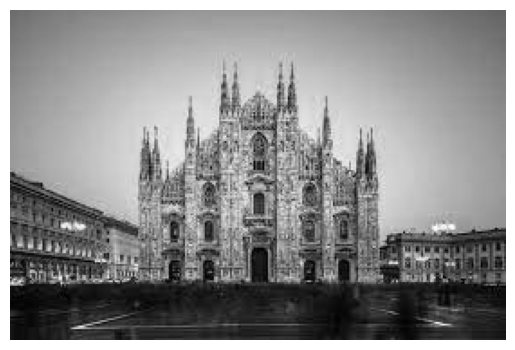

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
image_path = 'duomo.jpg'
img = imread(image_path)
A = np.mean(np.array(img, dtype = np.float64)/255, axis = -1)
plt.axis('off')
plt.imshow(A, cmap = 'gray')
A.shape

In [2]:
U, s, VT = np.linalg.svd(A)
print('U: ', U.shape, ' s: ',s.shape, ' VT: ', VT.shape)

U:  (183, 183)  s:  (183,)  VT:  (275, 275)


Text(0.5, 1.0, 'Explained variance')

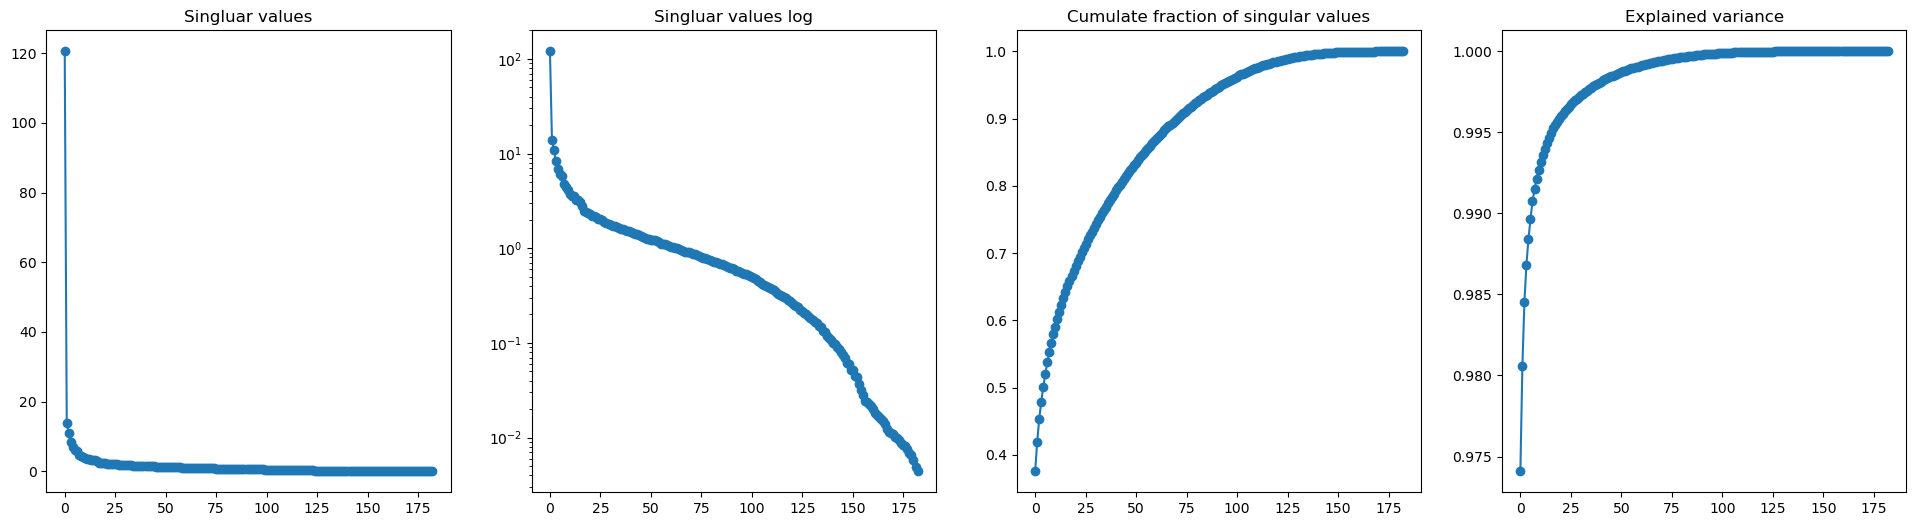

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,6))

axes[0].plot(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].semilogy(s, 'o-')
axes[1].set_title('Singluar values log')

axes[2].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[2].set_title('Cumulate fraction of singular values')

axes[3].plot(np.sqrt(np.cumsum(s**2)/np.sum(s**2)), 'o-')
axes[3].set_title('Explained variance')

In [4]:
def randomized_SVD(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, k)
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT

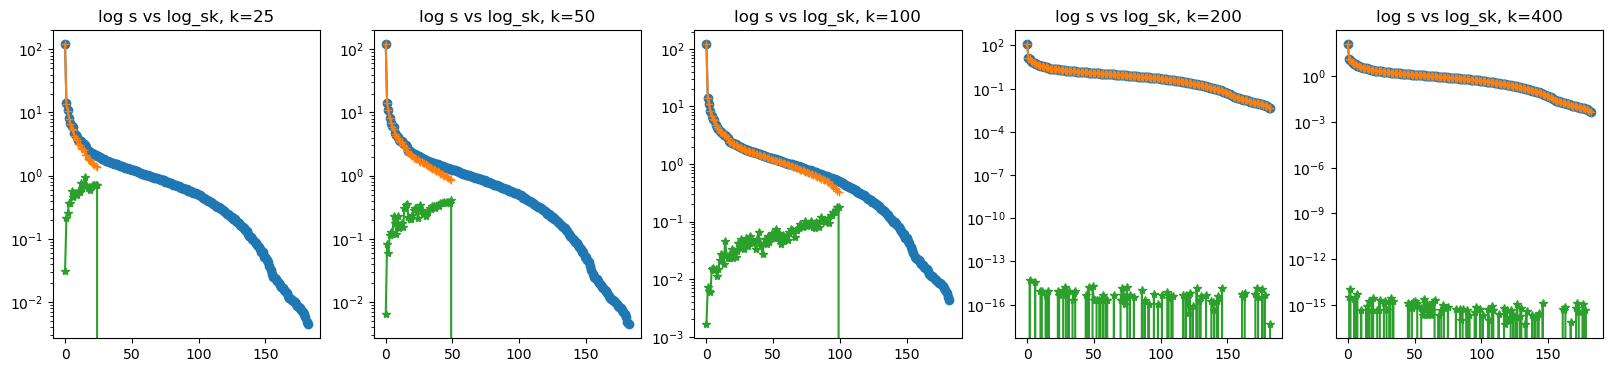

In [5]:
k = [25, 50, 100, 200, 400]
fig, axs = plt.subplots(nrows=1, ncols=len(k), figsize=(20,4))

for i in range(len(k)):
    U_k, s_k, VT_k = randomized_SVD(A, k[i])
    axs[i].semilogy(s  , 'o-')
    axs[i].semilogy(s_k, '+-')
    diff = np.zeros(len(s))
    for j in range(min(len(s_k),len(s))):
        diff[j] = s[j] - s_k[j]
    axs[i].semilogy(diff, '*-')
    axs[i].set_title(f'log s vs log_sk, k={k[i]}')


#### comment:

The two trend became identical (up to machine precision) in the last two plots. This is because the rank of the initial image is lower then 200 (183 in particular) so for k greater then 193 there is no randomization involved so the two singular value decomposition obtain the same result

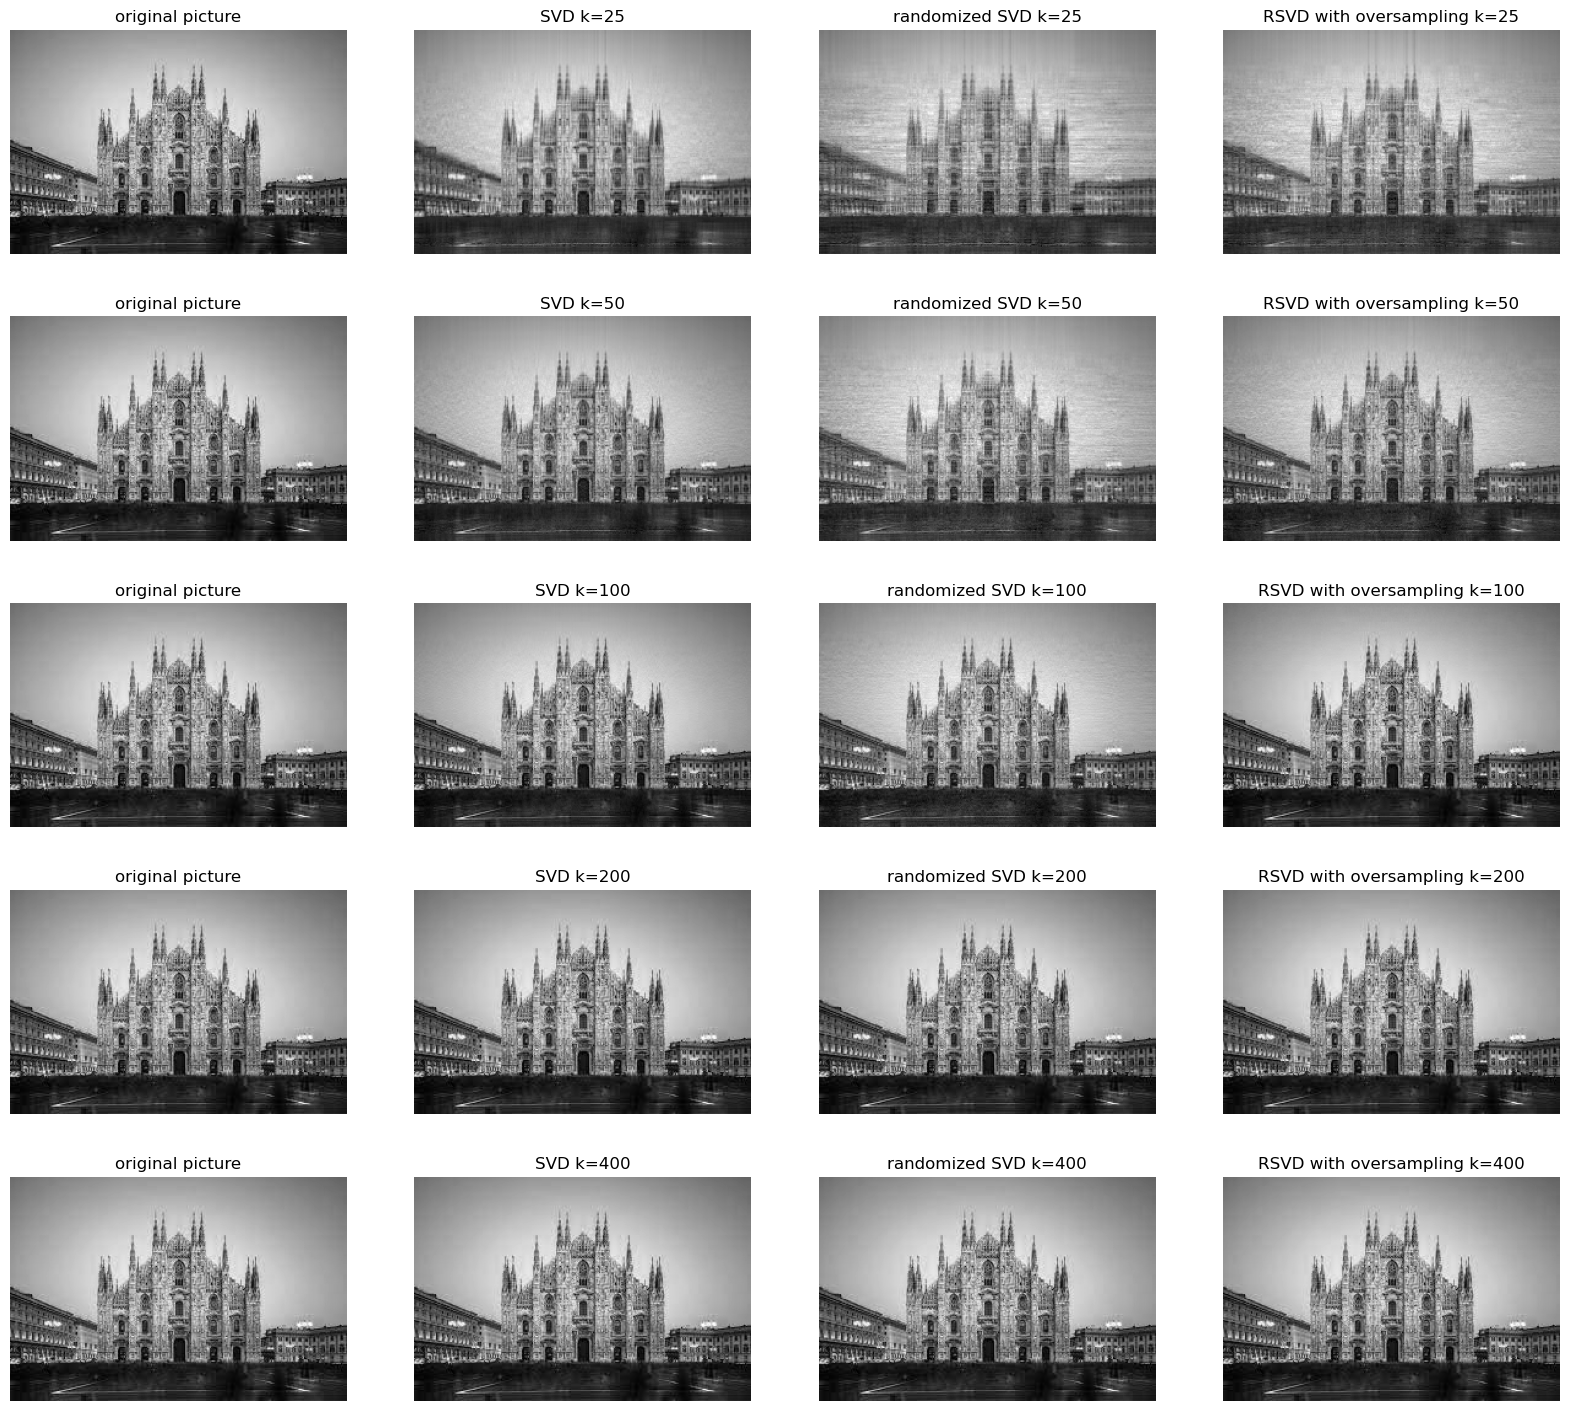

In [6]:
fig, axs = plt.subplots(nrows = len(k), ncols = 4, figsize = (20,18))

exact_errors = []
rand_errors = []
over_errors = []

def randomized_SVD_oversampling(A, k):
  n, m = A.shape[0], A.shape[1]
  P = np.random.randn(m, int(k*1.5))
  Z = A @ P
  Q, R = np.linalg.qr(Z)
  Y = Q.T @ A
  U_Y, s, VT = np.linalg.svd(Y, full_matrices = False)
  U = Q @ U_Y
  return U, s, VT


for i in range(len(k)):
    U_k, s_k, VT_k = randomized_SVD(A, k[i])
    U_o, s_o, VT_o = randomized_SVD_oversampling(A, k[i])
    
    axs[i][0].imshow(A, cmap='grey')
    r_exact = U[:,:min(len(U),k[i])] @ np.diag(s[:min(len(U),k[i])]) @ VT[:min(k[i],len(U)),:]
    axs[i][1].imshow(r_exact, cmap='grey')
    r_rand = U_k @ np.diag(s_k) @ VT_k
    axs[i][2].imshow(r_rand, cmap='grey')
    r_oversample = U_o @ np.diag(s_o) @ VT_o
    axs[i][3].imshow(r_oversample, cmap='grey')

    axs[i][0].set_title('original picture')
    axs[i][1].set_title(f'SVD k={k[i]}')
    axs[i][2].set_title(f'randomized SVD k={k[i]}')
    axs[i][3].set_title(f'RSVD with oversampling k={k[i]}')

    axs[i][0].axis('off')
    axs[i][1].axis('off')
    axs[i][2].axis('off')
    axs[i][3].axis('off')
    
    exact_errors.append(np.linalg.norm(A - r_exact, 'fro'))
    rand_errors.append(np.linalg.norm(A - r_rand, 'fro'))
    over_errors.append(np.linalg.norm(A - r_oversample, 'fro'))
    

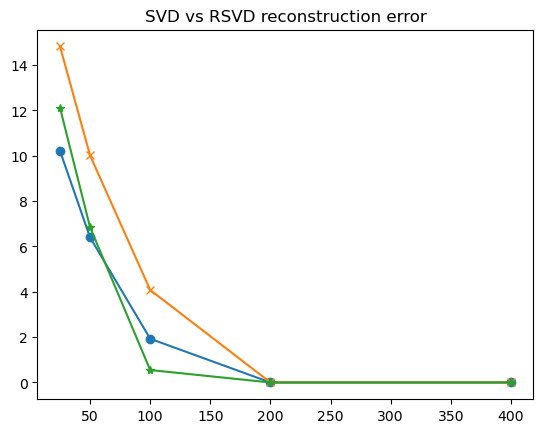

In [7]:
plt.plot(k, exact_errors, marker='o')
plt.plot(k, rand_errors, marker='x')
plt.plot(k, over_errors, marker='*')
plt.title('SVD vs RSVD reconstruction error')
plt.show()

In [8]:
%timeit np.linalg.svd(A)

22.3 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit randomized_SVD(A, 50)

4.08 ms ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit randomized_SVD_oversampling(A, 50)

7.59 ms ± 73.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 2
Consider the following function (where x = (x, y))
f (x) = 5x2 − 6xy + 5y 2 + 4x + 4y
(1)
1. Plot the function.
2. Compute analitically the value xmin where the function attains its minimum value and f (xmin ).
3. Write (1) as
1 T
x Hx + dT x + c.
2
Write explicitly the expressions for the matrix H, the vector d and the constant c. What is H ?
f (x) =
(2)
4. Consider the gradient descent (GD) method
xk+1 = xk − α∇f (xk ),
(3)
where α is the learning rate. Combining (2) and (3) find the expression of αmax (maximum value of α)
such that the GD method is convergent. (Hint: remember that for an iterative method to be convergent
the spectral radius ρ of the iteration matrix must satisfy |ρ| < 1).5. Find the value of αmax for the GD method applied to (1).
6. Implement the GD method and verify the conclusion drawn at the previous point. Use the stopping
criterium E < ϵ where E is the absolute value of the difference of the last two functional values i.e.
E = |f (xk+1 ) − f (xk )|,
(4)
and ϵ is the required tolerance (take ϵ = 10−3 ). Moreover set the maximum number of iterations to 200
and the initial guess equal to x0 = (−5, 7).

In [11]:
# The function f(x) is quadratic so it will present only one stationary pFloatingPointError
import jax.numpy as jnp
import jax
import sympy

x, y = sympy.symbols('x y')
f = 5*x**2-6*x*y+5*y**2+4*x+4*y
def ff(x, y):
    return 5*x**2-6*x*y+5*y**2+4*x+4*y
# jf = [sympy.diff(f, x), sympy.diff(f,y)]
# hf = [sympy.diff(jf, x), sympy.diff(jf,y)]
gradient = lambda f, v: Matrix([f]).jacobian(v)

jf = sympy.Matrix([f]).jacobian(sympy.Matrix(list(f.free_symbols)))
hf = sympy.hessian(f, [x, y])
print(hf)


print(jf)
roots = sympy.solve(jf, (x,y), dict=True)

for root in roots:
    eigen = hf.subs(x, root[x]).subs(y, root[y]).eigenvals()
    det = hf.subs(x, root[x]).subs(y, root[y]).det()
    print('For root (', root[x], ',', root[y], ') we have eigenvalues:', eigen, 'and determinant:', det)
    
    pos = 0
    neg = 0
    for val in eigen:
        if val>0:
            pos += 1
        if val<0:
            neg += 1
    if 0 not in eigen:
        if pos==0:
            print('  => f(', root, ') =', ff(root[x], root[y]), ' is a local maximum')
        if neg==0:
            print('  => f(', root, ') =', ff(root[x], root[y]), ' is a local minimium')
        if neg>0 and pos>0:
            print('  => f(', root, ') =', ff(root[x], root[y]), ' is a saddle point')


Matrix([[10, -6], [-6, 10]])
Matrix([[10*x - 6*y + 4, -6*x + 10*y + 4]])
For root ( -1 , -1 ) we have eigenvalues: {16: 1, 4: 1} and determinant: 64
  => f( {x: -1, y: -1} ) = -4  is a local minimium


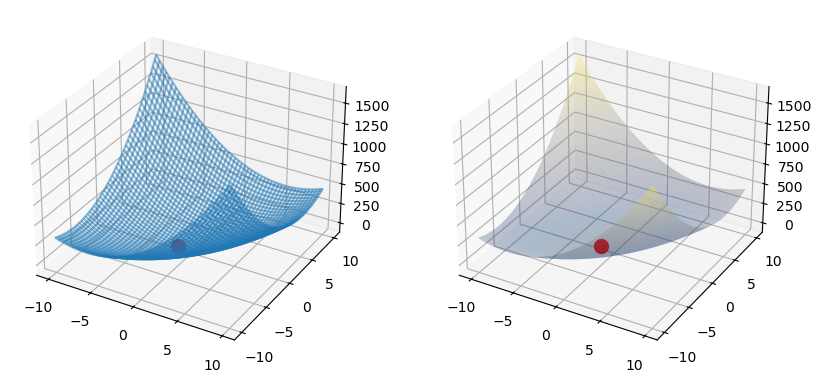

In [12]:
fig = plt.figure(figsize=(10,10))
x0 = np.arange(-10,10, 0.1)
y0 = np.arange(-10,10, 0.1) 
X, Y = np.meshgrid(x0, y0)

Z = ff(X, Y)
axs = fig.add_subplot(1, 2, 1, projection='3d')
axs.plot_wireframe(X, Y, Z, cmap = plt.cm.cividis, alpha=0.5)
axs.scatter(-1, -1, ff(-1,-1), c = 'red', s = 100)

axs = fig.add_subplot(1, 2, 2, projection='3d')
axs.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.3)
axs.scatter(-1, -1, ff(-1,-1), c = 'red', s = 100)

plt.show()


In [28]:
X = sympy.Matrix([[x],[y]])

f_temp = 0.5 * X.transpose() @ hf.subs(x, 0).subs(y, 0) @ X + jf.subs(x, 0).subs(y, 0) @ X
c = ff(-1, -1) - f_temp.subs(x, -1).subs(y, -1)[0,0]

f_taylor = f_temp + sympy.Matrix([[c]])
print(f_taylor)


Matrix([[x*(5.0*x - 3.0*y) + 4*x + y*(-3.0*x + 5.0*y) + 4*y]])


Matrix **H** is the hessian of f(X) computed for X=(x,y)=(0,0) however given that f was a second order paraboloid, the hessian is independet from the variable. So H is simply the hessian of f(X)

In [45]:
eigenvalues = hf.eigenvals()
max = None
for el in eigenvalues:
    if not max or el > max:
        max = el
alpha_max = 2/max
print(alpha_max)

1/8


In [64]:
def gradient_descent(alpha, X0, epsilon, max_iterations=1600):
    X = X0
    iteration = 0

    while iteration < max_iterations:
        gradient = jf.subs(x, X[0]).subs(y, X[1])
        gradient = np.array(gradient).astype(np.float64)[0]
        x_next = X - alpha * gradient
        # Stopping criterion
        E = np.abs(ff(x_next[0], x_next[1]) - ff(X[0], X[1]))
        if E < epsilon:
            print('last update: ', alpha * gradient, ' from:', X, ' to:', x_next)

            print(f"Converged in {iteration} iterations.")
            break

        X = x_next
        iteration += 1
    if iteration >= max_iterations:
            print(f"GD never converged")
    return X

# Set other parameters
x0 = [-5, 7]
epsilon = 1e-20

# Run gradient descent
print("testing maximum alpha")
result = gradient_descent(0.99 * alpha_max, x0, epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", ff(result[0], result[1]))

print("\ntesting alpha over maximum")
result = gradient_descent(1.01*alpha_max, x0, epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", ff(result[0], result[1]))

print("\ntesting heuristically good alpha")
result = gradient_descent(alpha_max/2, x0, epsilon)
print("Optimal x:", result)
print("Minimum value of f(x):", ff(result[0], result[1]))

testing maximum alpha
last update:  [9.47292945485678e-8 -9.47292945485678e-8]  from: [-0.999999952156922 -1.00000004784308]  to: [-1.00000004688622 -0.999999953113783]
Converged in 923 iterations.
Optimal x: [-0.999999952156922 -1.00000004784308]
Minimum value of f(x): -3.99999999999996

testing alpha over maximum
GD never converged
Optimal x: [-345482512607443. 345482512607441.]
Minimum value of f(x): 1.90973066428082e+30

testing heuristically good alpha
last update:  [6.72712646698770e-9 6.72712641147655e-9]  from: [-0.999999973091494 -0.999999973091494]  to: [-0.999999979818620 -0.999999979818620]
Converged in 63 iterations.
Optimal x: [-0.999999973091494 -0.999999973091494]
Minimum value of f(x): -4.00000000000000
